In [1]:
%matplotlib inline
%matplotlib notebook

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import to_datetime
from scipy.optimize import curve_fit

In [47]:
filenames = ['data/189_2014.txt']

raw_data = []
for f in filenames:
    raw_data = np.concatenate((raw_data, np.loadtxt(f, delimiter=',', skiprows=1, dtype=str)))
date_data = np.genfromtxt((i[:-2] if i[-1] == '3' else '' for i in raw_data), delimiter=';', 
                     dtype=[('date', 'U19'), ('height', 'float')])

In [48]:
file = open("data.txt", "w")
beginning = np.datetime64(to_datetime(date_data[0][0], dayfirst=True), 's')
for d in date_data:
    file.writelines([str(np.datetime64(to_datetime(d[0], dayfirst=True), 's'))+';', 
                     str((np.datetime64(to_datetime(d[0], dayfirst=True), 's')
                          -beginning).item().total_seconds())+';', str(d[1])+'\n'])
file.close()

## import

In [49]:
data = np.genfromtxt('data.txt', delimiter=";", usecols = range(1,3))
dates = np.genfromtxt('data.txt', dtype='datetime64[s]', delimiter=";", usecols = range(0,1))

<IPython.core.display.Javascript object>


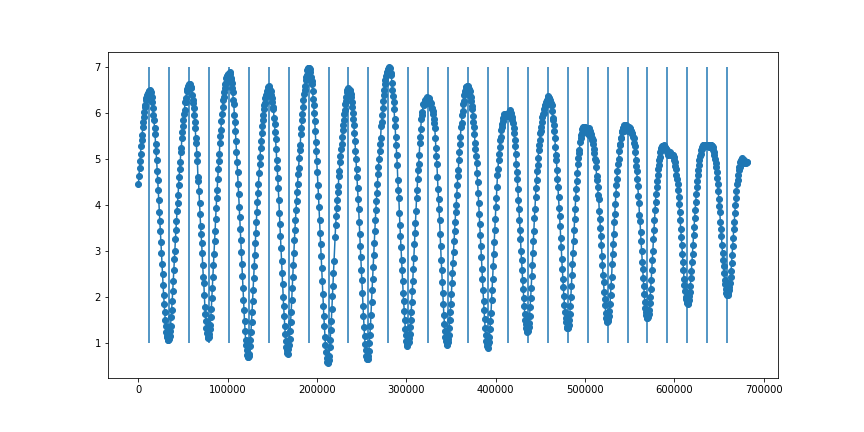

In [221]:
plt.rcParams["figure.figsize"] = (12,6)
period = (6*60 + 12) * 60
offset = 12000
n = 30
l = int((n*period + offset)/600)

plt.plot(data[:l,0], data[:l,1], 'o-')
for i in range(n):
    plt.vlines(i*period+offset, 1, 7)

<IPython.core.display.Javascript object>


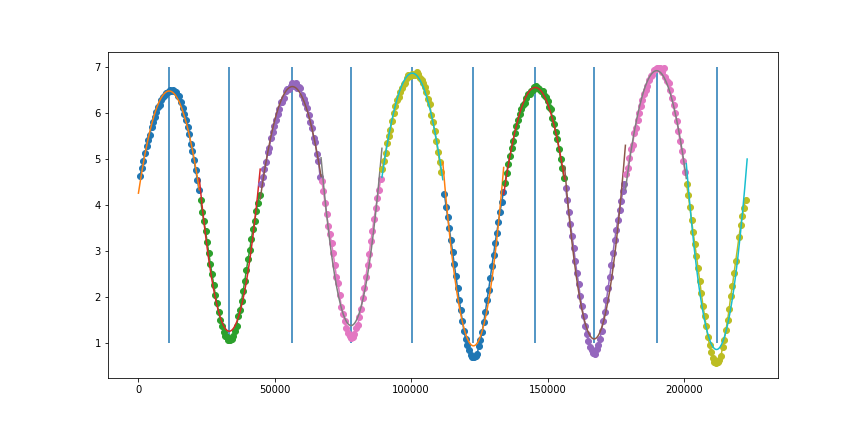

In [246]:
def f(x, a, b, c):
    return a * (x - b)**2 + c

max_list = []

# nächsten Nulldurchgang finden

for i in range(10):
    cut_data = data[(data[:,0]<(i+1)*period)&(data[:,0]>i*period)]
    plt.plot(cut_data[:,0], cut_data[:,1], 'o-')
    params = curve_fit(f, cut_data[:,0], cut_data[:,1], [0, i*period + period/2, 0])
    plt.plot(np.linspace(i*period, (i+1)*period, 1000), f(np.linspace(i*period, (i+1)*period, 1000), params[0][0], params[0][1], params[0][2]))
    plt.vlines(params[0][1], 1, 7)
    max_list.append(params[0][1])



6.2270419756059345


<IPython.core.display.Javascript object>


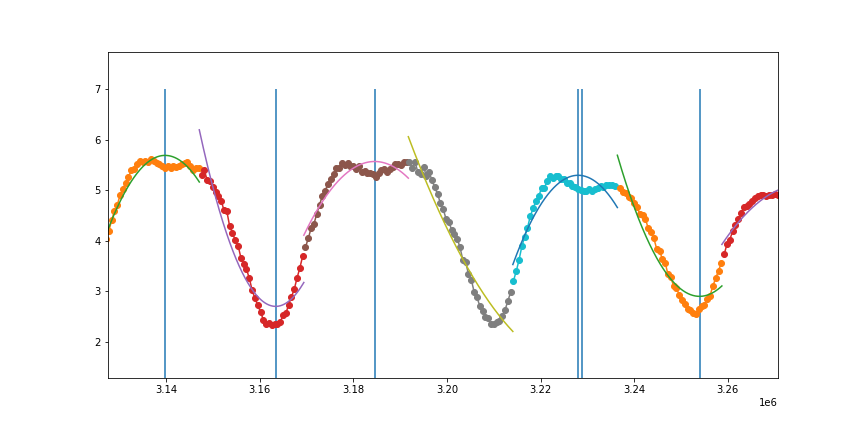

In [240]:
max_diff = [(max_list[i+1]-max_list[i])/3600 for i in range(len(max_list)-1)]
print(np.mean(max_diff))
plt.plot(max_diff)

In [242]:
np.mean(max_diff)*3600

22417.351112181364